In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost 
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [50]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [51]:
import yfinance as yf

In [52]:
dset = yf.download("SPY", start="2015-01-01", end="2021-12-31",progress=False)
dset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342621,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085709,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417725,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603683,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755264,147217800
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600


In [53]:
dset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,281.781374,283.204024,280.214007,281.823286,267.237661,9.147974e+07
std,72.922996,73.239032,72.568488,72.942577,79.375828,4.949597e+07
min,182.339996,184.100006,181.020004,182.860001,163.841537,2.027000e+07
25%,216.825001,217.270004,215.902504,216.755001,196.686584,5.885638e+07
50%,270.945007,272.875000,269.139999,270.625000,254.819077,7.764630e+07
75%,313.977501,314.537491,311.207504,312.544998,303.330124,1.071588e+08
max,477.929993,479.000000,476.059998,477.480011,477.480011,5.072443e+08


In [98]:
duplicate = dset.duplicated()
print(duplicate.sum())
dset[duplicate]

0


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [90]:
dset.copy()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,206.380005,206.880005,204.179993,205.429993,180.342621,121465900
2015-01-05,204.169998,204.369995,201.350006,201.720001,177.085709,169632600
2015-01-06,202.089996,202.720001,198.860001,199.820007,175.417725,209151400
2015-01-07,201.419998,202.720001,200.880005,202.309998,177.603683,125346700
2015-01-08,204.009995,206.160004,203.990005,205.899994,180.755264,147217800
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600


In [54]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [55]:
dset.shape

(1762, 6)

In [91]:
#Normalizing the data
scaler=Normalizer().fit(dset)
normalizeData=scaler.transform(dset)
normalize_dset=pd.DataFrame(normalizeData,index=dset.index,columns=dset.columns)
print(normalize_dset)

                    Open          High           Low         Close  \
Date                                                                 
2015-01-02  1.699078e-06  1.703194e-06  1.680966e-06  1.691256e-06   
2015-01-05  1.203601e-06  1.204780e-06  1.186977e-06  1.189158e-06   
2015-01-06  9.662378e-07  9.692500e-07  9.507945e-07  9.553845e-07   
2015-01-07  1.606903e-06  1.617274e-06  1.602595e-06  1.614003e-06   
2015-01-08  1.385770e-06  1.400374e-06  1.385634e-06  1.398608e-06   
...                  ...           ...           ...           ...   
2021-12-23  8.305324e-06  8.366274e-06  8.303375e-06  8.338103e-06   
2021-12-27  8.309657e-06  8.402073e-06  8.308777e-06  8.401193e-06   
2021-12-28  1.010522e-05  1.012827e-05  1.007010e-05  1.008723e-05   
2021-12-29  8.751445e-06  8.780434e-06  8.731997e-06  8.760619e-06   
2021-12-30  8.637965e-06  8.657304e-06  8.597119e-06  8.605975e-06   

               Adj Close  Volume  
Date                              
2015-01-02  1.48471

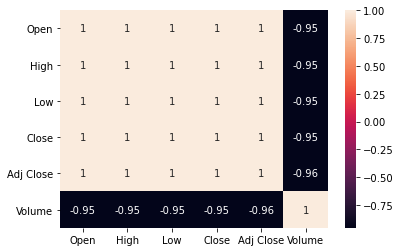

In [57]:
normalize_dset = pd.DataFrame(normalize_dset,columns=['Open','High','Low','Close','Adj Close','Volume'])
corrMatrix = normalize_dset.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Strategy 1:

In [58]:
normalize_dset = normalize_dset.copy()
normalize_dset["y"] = np.where(normalize_dset["Close"].shift(-1) > normalize_dset["Close"], 1, -1)

In [59]:
normalize_dset = normalize_dset.rename(columns={"Close":"Close"})
normalize_dset

,Open,High,Low,Close,Adj Close,Volume,y
Date,,,,,,,
2015-01-02,1.699078e-06,1.703194e-06,1.680966e-06,1.691256e-06,1.484718e-06,1.0,-1
2015-01-05,1.203601e-06,1.204780e-06,1.186977e-06,1.189158e-06,1.043937e-06,1.0,-1
2015-01-06,9.662378e-07,9.692500e-07,9.507945e-07,9.553845e-07,8.387117e-07,1.0,1
2015-01-07,1.606903e-06,1.617274e-06,1.602595e-06,1.614003e-06,1.416900e-06,1.0,-1
2015-01-08,1.385770e-06,1.400374e-06,1.385634e-06,1.398608e-06,1.227808e-06,1.0,-1
...,...,...,...,...,...,...,...
2021-12-23,8.305324e-06,8.366274e-06,8.303375e-06,8.338103e-06,8.338103e-06,1.0,1
2021-12-27,8.309657e-06,8.402073e-06,8.308777e-06,8.401193e-06,8.401193e-06,1.0,1
2021-12-28,1.010522e-05,1.012827e-05,1.007010e-05,1.008723e-05,1.008723e-05,1.0,-1


# Splitting data of Strategy 1 :

In [60]:
y1=normalize_dset['y']
x1=normalize_dset.drop(columns=['y'])

In [61]:
from sklearn.model_selection import train_test_split
x1_train,x1_val,y1_train,y1_val=train_test_split(x1,y1,test_size=0.2,stratify=normalize_dset['y'],random_state=42)
x1_train.shape,x1_val.shape,y1_train.shape,y1_val.shape

((1409, 6), (353, 6), (1409,), (353,))

# K-Nearest Neighbors(KNN) :

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(x1_train, y1_train)
neigh_preds=neigh.predict(x1_val)
print("Classification Report:",)
print('Accuracy : {}'.format(accuracy_score(y1_val, neigh_preds)))
print('Precision : {}'.format(precision_score(neigh_preds,y1_val)))
print('Recall : {}'.format(recall_score(y1_val, neigh_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, neigh_preds)))
print('Confusion Matrix Of KNeighbors :\n',(confusion_matrix(y1_val,neigh_preds)))

Classification Report:
Accuracy : 0.6288951841359773
Precision : 0.6815642458100558
Recall : 0.6815642458100558
F1 Score : 0.6506666666666667
Confusion Matrix Of KNeighbors :
 [[100  74]
 [ 57 122]]


# Random Forest(RF) :

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=100)
rf.fit(x1_train, y1_train)
rf_preds=rf.predict(x1_val)
print("Classification Report:",)
print('Random Forest')
print('Accuracy : {}'.format(accuracy_score(y1_val, rf_preds)))
print('Precision : {}'.format(precision_score(y1_val, rf_preds)))
print('Recall : {}'.format(recall_score(y1_val, rf_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, rf_preds)))
print('Confusion Matrix Of RandomForest :\n',(confusion_matrix(y1_val,rf_preds)))

Classification Report:
Random Forest
Accuracy : 0.5439093484419264
Precision : 0.5283018867924528
Recall : 0.9385474860335196
F1 Score : 0.676056338028169
Confusion Matrix Of RandomForest :
 [[ 24 150]
 [ 11 168]]


# Gradient Boosting :

In [65]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x1_train, y1_train)
gbc_preds=gbc.predict(x1_val)
print("Classification Report:",)
print('Accuracy : {}'.format(accuracy_score(y1_val, gbc_preds)))
print('Precision : {}'.format(precision_score(y1_val, gbc_preds)))
print('Recall : {}'.format(recall_score(y1_val, gbc_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, gbc_preds)))
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y1_val,gbc_preds)))

Classification Report:
Accuracy : 0.5410764872521246
Precision : 0.5266457680250783
Recall : 0.9385474860335196
F1 Score : 0.6746987951807228
Confusion Matrix Of GradientBoostingClassifier :
 [[ 23 151]
 [ 11 168]]


# Support Vector Machines (SVMs) :

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x1_train, y1_train)
clf_preds=clf.predict(x1_val)
print("Classification Report:",)
print('Accuracy : {}'.format(accuracy_score(y1_val, clf_preds)))
print('Precision : {}'.format(precision_score(y1_val, clf_preds)))
print('Recall : {}'.format(recall_score(y1_val, clf_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, clf_preds)))
print('Confusion Matrix Of Support Vector Machines :\n',(confusion_matrix(y1_val,clf_preds)))

Classification Report:
Accuracy : 0.5949008498583569
Precision : 0.5818181818181818
Recall : 0.7150837988826816
F1 Score : 0.6416040100250627
Confusion Matrix Of Support Vector Machines :
 [[ 82  92]
 [ 51 128]]


# XGBoost Classifier :

In [67]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x1_train, y1_train)
xgb_preds = xgb.predict(x1_val)
print("Classification Report:",)
print('Accuracy : {}'.format(accuracy_score(y1_val, xgb_preds)))
print('Precision : {}'.format(precision_score(y1_val, xgb_preds)))
print('Recall : {}'.format(recall_score(y1_val, xgb_preds)))
print('F1 Score : {}'.format(f1_score(y1_val, xgb_preds)))
print('Confusion Matrix Of XGBoost Classifier :\n',(confusion_matrix(y1_val,xgb_preds)))

[16:42:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/suvinshah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report:
Accuracy : 0.6430594900849859
Precision : 0.6402116402116402
Recall : 0.6759776536312849
F1 Score : 0.657608695652174
Confusion Matrix Of XGBoost Classifier :
 [[106  68]
 [ 58 121]]


# Strategy 2:

In [68]:
data2 = normalize_dset.copy()
data2["50_sma"] = data2["Adj Close"].rolling(50).mean()
data2["200_sma"] = data2["Adj Close"].rolling(200).mean()

data2 = data2.dropna() 
data2["signal"] = data2.apply(lambda row: 1 if row[f"50_sma"] > row[f"200_sma"]  else 0, axis=1)
data2

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal
Date,,,,,,,,,,
2015-10-16,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,1,0.000001,0.000002,0
2015-10-19,0.000003,0.000003,0.000003,0.000003,0.000002,1.0,-1,0.000001,0.000002,0
2015-10-20,0.000003,0.000003,0.000003,0.000003,0.000002,1.0,-1,0.000001,0.000002,0
2015-10-21,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,-1,0.000001,0.000002,0
2015-10-22,0.000001,0.000001,0.000001,0.000001,0.000001,1.0,1,0.000001,0.000002,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1
2021-12-27,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1
2021-12-28,0.000010,0.000010,0.000010,0.000010,0.000010,1.0,-1,0.000007,0.000007,1


In [69]:
list_golden_cross_ts = []
first_golden_cross = False

In [70]:
for idx, each in data2['signal'].iteritems():
    if each == 1:
        # If its the first golden cross we see we add the timestamp
        if first_golden_cross:
            list_golden_cross_ts.append(idx)
            first_golden_cross = False
    else:
        first_golden_cross = True

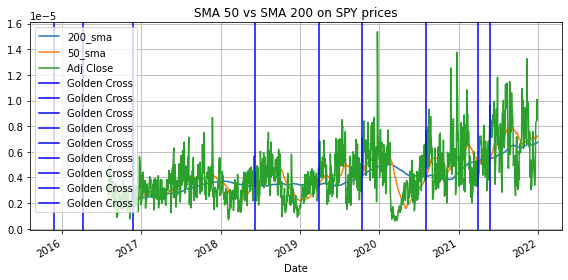

In [92]:
fig, axes = plt.subplots(1,1, figsize=(8,4))
data2[["200_sma","50_sma","Adj Close"]].plot(figsize=(8,4), grid=True, title="SMA 50 vs SMA 200 on SPY prices", ax=axes)

for each in list_golden_cross_ts:
    axes.axvline(x=each, label="Golden Cross", c="blue")
    
axes.legend()
fig.tight_layout()

In [72]:
data2['50MDA']=data2['Close'].rolling(50).mean()
data2['200MDA']=data2['Close'].rolling(200).mean()
data2

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal,50MDA,200MDA
Date,,,,,,,,,,,,
2015-10-16,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,1,0.000001,0.000002,0,NaN,NaN
2015-10-19,0.000003,0.000003,0.000003,0.000003,0.000002,1.0,-1,0.000001,0.000002,0,NaN,NaN
2015-10-20,0.000003,0.000003,0.000003,0.000003,0.000002,1.0,-1,0.000001,0.000002,0,NaN,NaN
2015-10-21,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,-1,0.000001,0.000002,0,NaN,NaN
2015-10-22,0.000001,0.000001,0.000001,0.000001,0.000001,1.0,1,0.000001,0.000002,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007
2021-12-27,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007
2021-12-28,0.000010,0.000010,0.000010,0.000010,0.000010,1.0,-1,0.000007,0.000007,1,0.000007,0.000007


In [73]:
data2=data2.dropna().copy()
data2

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal,50MDA,200MDA
Date,,,,,,,,,,,,
2016-08-02,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,1,0.000002,0.000002,1,0.000003,0.000002
2016-08-03,0.000004,0.000004,0.000004,0.000004,0.000004,1.0,1,0.000002,0.000002,1,0.000003,0.000002
2016-08-04,0.000005,0.000005,0.000005,0.000005,0.000004,1.0,-1,0.000002,0.000002,1,0.000003,0.000002
2016-08-05,0.000003,0.000003,0.000003,0.000003,0.000003,1.0,1,0.000002,0.000002,1,0.000003,0.000002
2016-08-08,0.000005,0.000005,0.000005,0.000005,0.000005,1.0,-1,0.000002,0.000002,1,0.000003,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007
2021-12-27,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007
2021-12-28,0.000010,0.000010,0.000010,0.000010,0.000010,1.0,-1,0.000007,0.000007,1,0.000007,0.000007


In [74]:
y2 = np.where(data2['50MDA'].shift(-1) > data2['200MDA'], 1, -1)

In [75]:
data2['y2'] = y2
data2

,Open,High,Low,Close,Adj Close,Volume,y,50_sma,200_sma,signal,50MDA,200MDA,y2
Date,,,,,,,,,,,,,
2016-08-02,0.000002,0.000002,0.000002,0.000002,0.000002,1.0,1,0.000002,0.000002,1,0.000003,0.000002,1
2016-08-03,0.000004,0.000004,0.000004,0.000004,0.000004,1.0,1,0.000002,0.000002,1,0.000003,0.000002,1
2016-08-04,0.000005,0.000005,0.000005,0.000005,0.000004,1.0,-1,0.000002,0.000002,1,0.000003,0.000002,1
2016-08-05,0.000003,0.000003,0.000003,0.000003,0.000003,1.0,1,0.000002,0.000002,1,0.000003,0.000002,1
2016-08-08,0.000005,0.000005,0.000005,0.000005,0.000005,1.0,-1,0.000002,0.000002,1,0.000003,0.000002,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007,1
2021-12-27,0.000008,0.000008,0.000008,0.000008,0.000008,1.0,1,0.000007,0.000007,1,0.000007,0.000007,1
2021-12-28,0.000010,0.000010,0.000010,0.000010,0.000010,1.0,-1,0.000007,0.000007,1,0.000007,0.000007,1


In [76]:
y2=data2['y2']
x2=data2.drop(columns=['y2'])

# Splitting the data in 80:20% ratio :

In [77]:
from sklearn.model_selection import train_test_split
x2_train,x2_val,y2_train,y2_val=train_test_split(x2,y2,test_size=0.2,stratify=data2['y2'],random_state=42)
x2_train.shape,x2_val.shape,y2_train.shape,y2_val.shape

((1091, 12), (273, 12), (1091,), (273,))

# K-Nearest Neighbors(KNN) :

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(x2_train, y2_train)
neigh_preds=neigh.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, neigh_preds)))
print('Precision : {}'.format(precision_score(y2_val,neigh_preds)))
print('Recall : {}'.format(recall_score(y2_val, neigh_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, neigh_preds)))
print('Confusion Matrix Of KNeighbors :\n',(confusion_matrix(y2_val,neigh_preds)))

Accuracy : 0.989010989010989
Precision : 0.99
Recall : 0.9949748743718593
F1 Score : 0.9924812030075189
Confusion Matrix Of KNeighbors :
 [[ 72   2]
 [  1 198]]


# Random Forest Classifier(RF) :

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=None, random_state=0,n_estimators=100)
rf.fit(x2_train, y2_train)
rf_preds=rf.predict(x2_val)
print('Random Forest')
print('Accuracy : {}'.format(accuracy_score(y2_val, rf_preds)))
print('Precision : {}'.format(precision_score(y2_val, rf_preds)))
print('Recall : {}'.format(recall_score(y2_val, rf_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, rf_preds)))
print('Confusion Matrix Of RandomForest :\n',(confusion_matrix(y2_val,rf_preds)))

Random Forest
Accuracy : 0.989010989010989
Precision : 0.99
Recall : 0.9949748743718593
F1 Score : 0.9924812030075189
Confusion Matrix Of RandomForest :
 [[ 72   2]
 [  1 198]]


# Gradient Boosting Classifier :

In [80]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x2_train, y2_train)
gbc_preds=gbc.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, gbc_preds)))
print('Precision : {}'.format(precision_score(y2_val, gbc_preds)))
print('Recall : {}'.format(recall_score(y2_val, gbc_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, gbc_preds)))
print('Confusion Matrix Of GradientBoostingClassifier :\n',(confusion_matrix(y2_val,gbc_preds)))

Accuracy : 0.989010989010989
Precision : 0.99
Recall : 0.9949748743718593
F1 Score : 0.9924812030075189
Confusion Matrix Of GradientBoostingClassifier :
 [[ 72   2]
 [  1 198]]


# Support Vector Machines :

In [81]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(x2_train, y2_train)
clf_preds=clf.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, clf_preds)))
print('Precision : {}'.format(precision_score(y2_val, clf_preds)))
print('Recall : {}'.format(recall_score(y2_val, clf_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, clf_preds)))
print('Confusion Matrix Of Support Vector Machines :\n',(confusion_matrix(y2_val,clf_preds)))

Accuracy : 0.989010989010989
Precision : 0.99
Recall : 0.9949748743718593
F1 Score : 0.9924812030075189
Confusion Matrix Of Support Vector Machines :
 [[ 72   2]
 [  1 198]]


# XGBoost Classifier :

In [82]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x2_train, y2_train)
xgb_preds=xgb.predict(x2_val)
print('Accuracy : {}'.format(accuracy_score(y2_val, xgb_preds)))
print('Precision : {}'.format(precision_score(y2_val, xgb_preds)))
print('Recall : {}'.format(recall_score(y2_val, xgb_preds)))
print('F1 Score : {}'.format(f1_score(y2_val, xgb_preds)))
print('Confusion Matrix Of XGBoost Classifier :\n',(confusion_matrix(y2_val,xgb_preds)))

[16:42:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.989010989010989
Precision : 0.99
Recall : 0.9949748743718593
F1 Score : 0.9924812030075189
Confusion Matrix Of XGBoost Classifier :
 [[ 72   2]
 [  1 198]]


/Users/suvinshah/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# Tuning K-Neighbor Classifier :

In [131]:
model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')
model1=model.fit(x1_train,y1_train)
neigh_preds=model1.predict(x1_val)
dt_result = accuracy_score(y1_val, neigh_preds)
print('Accuracy :', dt_result *100)

Accuracy : 63.172804532577906
